# Exploratory Data Analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [43]:
# === 1. Importera bibliotek ===
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# === 2. Läs in data ===
df = pd.read_csv("recruitment_data.csv")

# === 3. Dela upp features (X) och target (y) ===
X = df.drop("HiringDecision", axis=1)
y = df["HiringDecision"]

# === 4. Train/Test-split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# === 5. Träna beslutsträds-klassificerare ===
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# === 6. Prediktion på testdata ===
y_pred = clf.predict(X_test)

# === 7. Utvärdera modellen ===
print("Accuracy :",  accuracy_score(y_test, y_pred))
print("Precision:",  precision_score(y_test, y_pred))
print("Recall   :",  recall_score(y_test, y_pred))
print("F1-score :",  f1_score(y_test, y_pred))

# === 8. Exempel: ny kandidat att förutsäga ===
new_candidate = pd.DataFrame([{
    "Age": 8,
    "Gender": 1,
    "EducationLevel": 2,
    "ExperienceYears": 1,
    "PreviousCompanies": 1,
    "DistanceFromCompany": 10.5,
    "InterviewScore": 100,
    "SkillScore": 60,
    "PersonalityScore": 70,
    "RecruitmentStrategy": 2
}])

decision = clf.predict(new_candidate)[0]
print("\nNy kandidat – beslut:", "Anställ" if decision == 1 else "Anställ ej")



Accuracy : 0.8833333333333333
Precision: 0.7659574468085106
Recall   : 0.8470588235294118
F1-score : 0.8044692737430168

Ny kandidat – beslut: Anställ


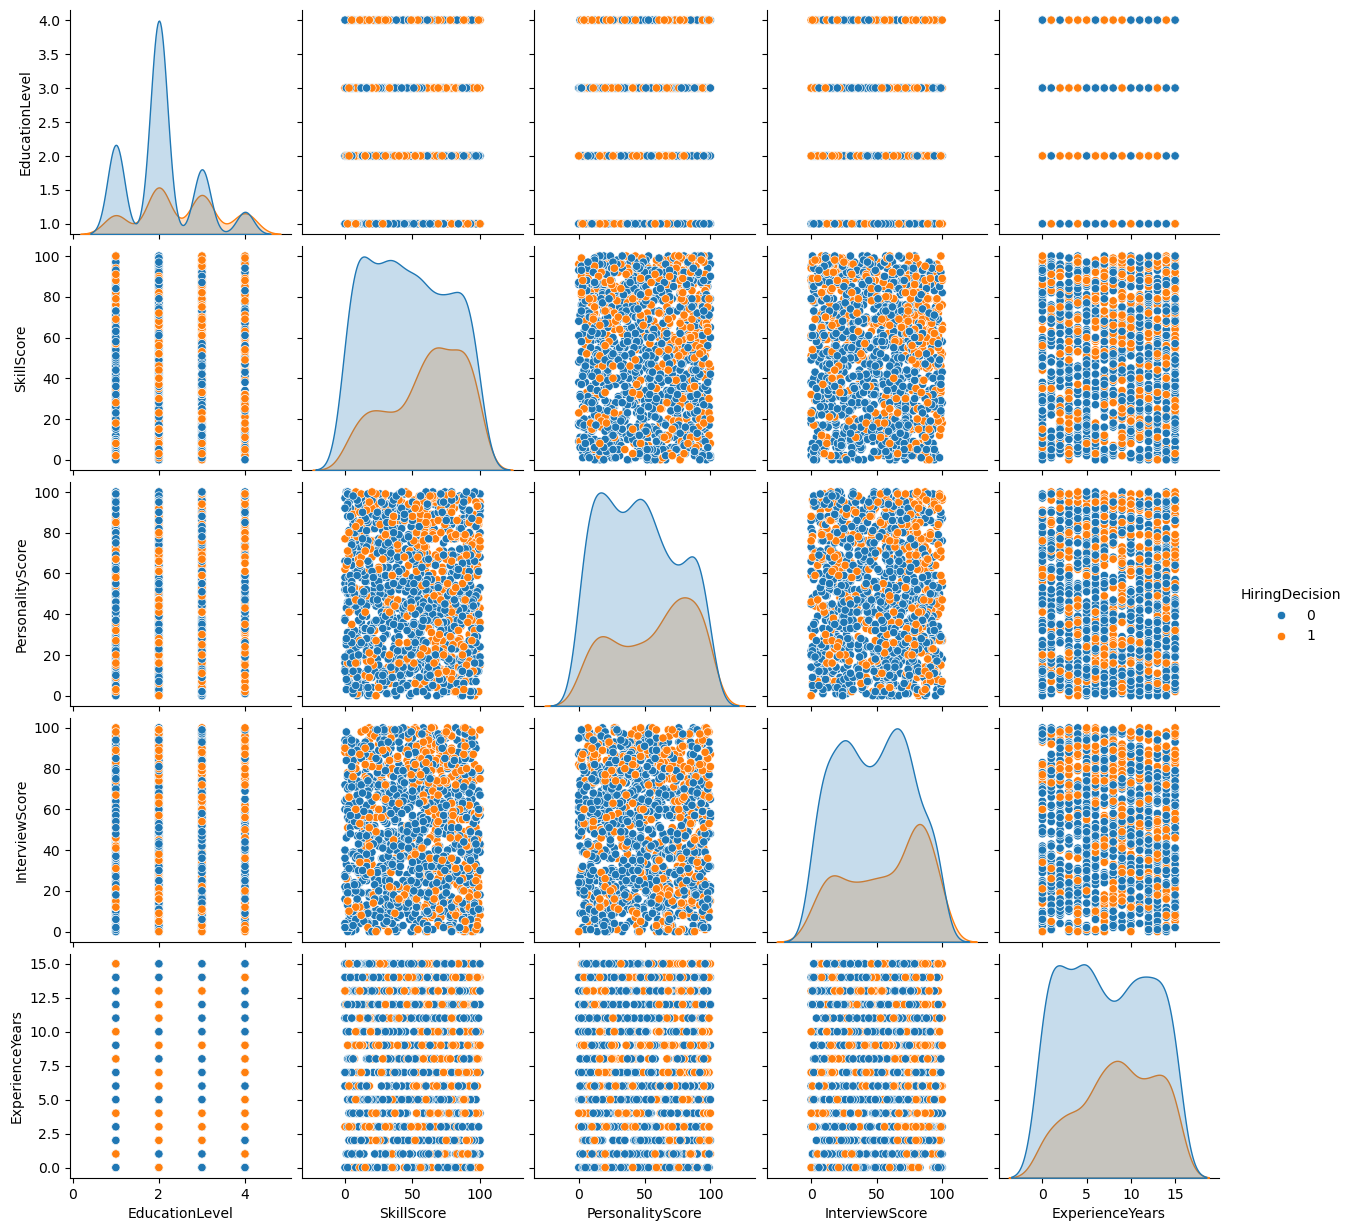

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("recruitment_data.csv")

# Välj de mest intressanta features (t.ex. de med hög korrelation mot HiringDecision)
cols = ["HiringDecision","EducationLevel","SkillScore",
        "PersonalityScore","InterviewScore","ExperienceYears"]

sns.pairplot(df[cols], hue="HiringDecision", diag_kind="kde")
plt.show()

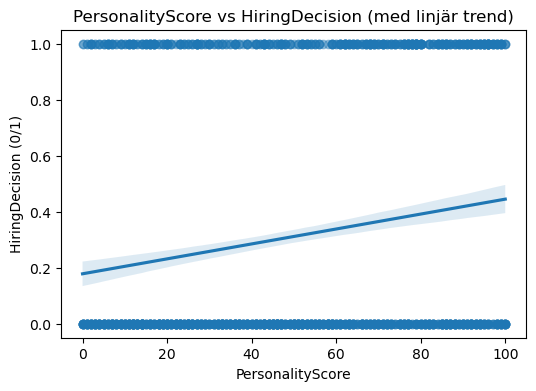

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("recruitment_data.csv")

plt.figure(figsize=(6,4))
sns.regplot(
    x="PersonalityScore",
    y="HiringDecision",
    data=df,
    logistic=False,   # vanlig linjär regression
    scatter_kws={"alpha":0.4}
)
plt.title("PersonalityScore vs HiringDecision (med linjär trend)")
plt.xlabel("PersonalityScore")
plt.ylabel("HiringDecision (0/1)")
plt.show()

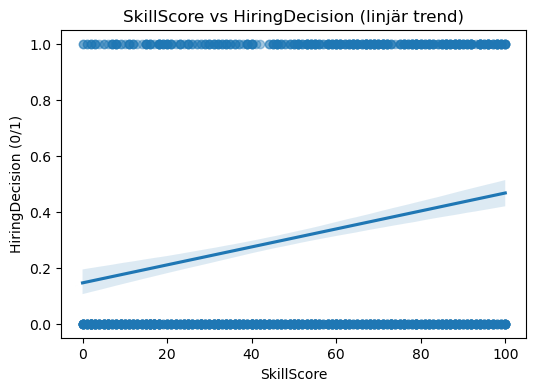

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("recruitment_data.csv")

plt.figure(figsize=(6,4))
sns.regplot(
    x="SkillScore",
    y="HiringDecision",
    data=df,
    logistic=False,   # linjär trend
    scatter_kws={"alpha":0.4}
)
plt.title("SkillScore vs HiringDecision (linjär trend)")
plt.xlabel("SkillScore")
plt.ylabel("HiringDecision (0/1)")
plt.show()

Antal rader: 1500, kolumner: 11

Datatyper per kolumn:
 Age                      int64
Gender                   int64
EducationLevel           int64
ExperienceYears          int64
PreviousCompanies        int64
DistanceFromCompany    float64
InterviewScore           int64
SkillScore               int64
PersonalityScore         int64
RecruitmentStrategy      int64
HiringDecision           int64 



,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0
5,27,0,3,14,4,31.706659,54,50,50,1,1
6,48,0,2,6,1,17.291229,24,52,64,3,0
7,40,0,4,13,3,10.586811,6,3,92,3,0
8,26,1,3,6,5,28.774864,80,78,51,1,1
9,45,1,2,2,5,30.195964,92,16,94,3,0



Saknade värden per kolumn:
                      missing_count  missing_pct
Age                              0          0.0
Gender                           0          0.0
EducationLevel                   0          0.0
ExperienceYears                  0          0.0
PreviousCompanies                0          0.0
DistanceFromCompany              0          0.0
InterviewScore                   0          0.0
SkillScore                       0          0.0
PersonalityScore                 0          0.0
RecruitmentStrategy              0          0.0
HiringDecision                   0          0.0

Antal dubblettrader: 0

Antal unika värden per kolumn:
 Age                      31
Gender                    2
EducationLevel            4
ExperienceYears          16
PreviousCompanies         5
DistanceFromCompany    1500
InterviewScore          101
SkillScore              101
PersonalityScore        101
RecruitmentStrategy       3
HiringDecision            2
dtype: int64

Deskriptiv stati

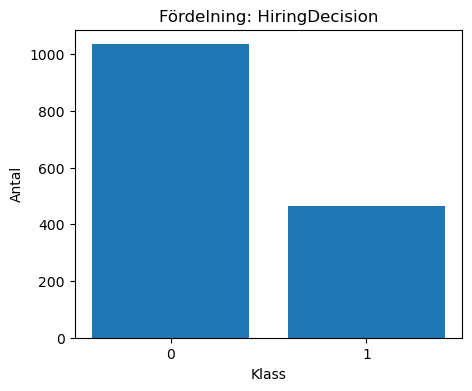

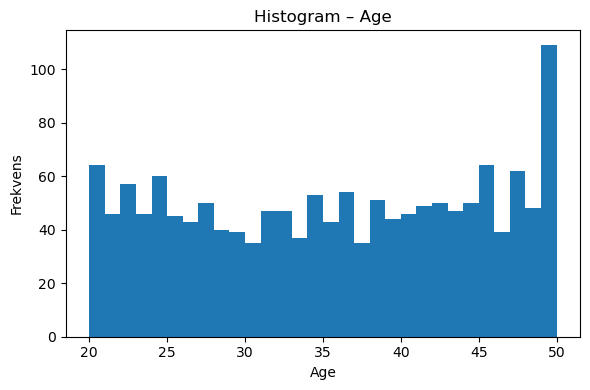

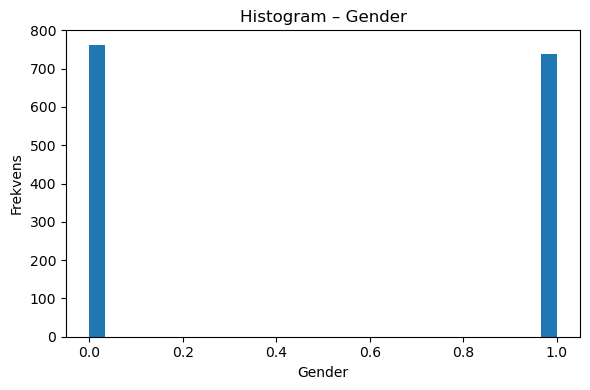

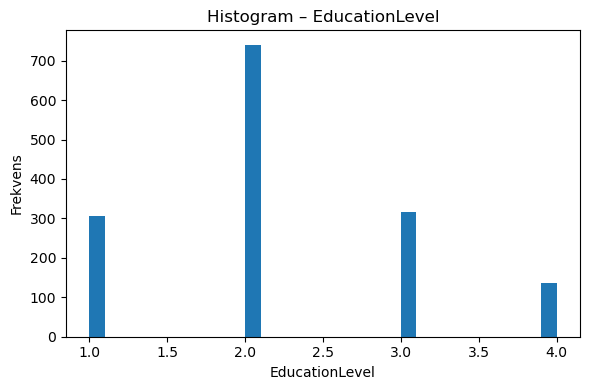

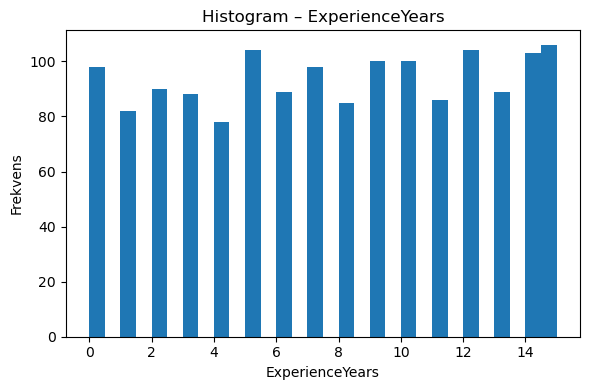

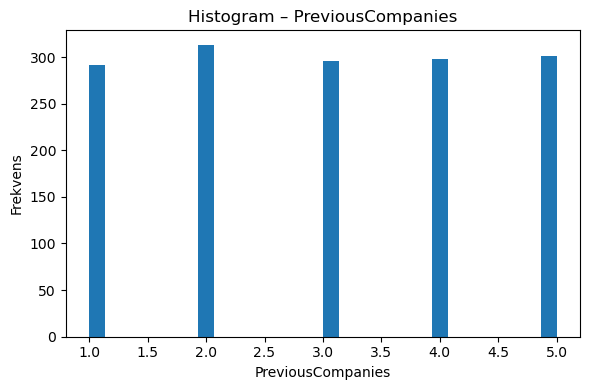

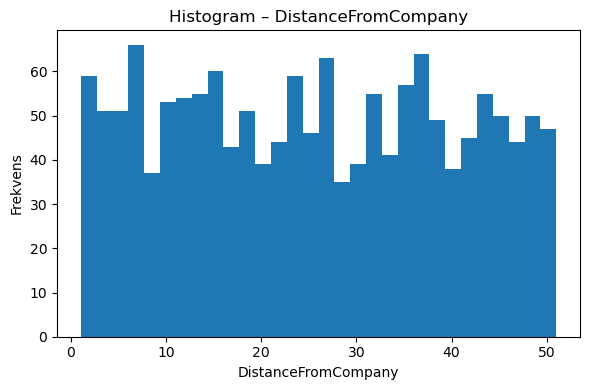

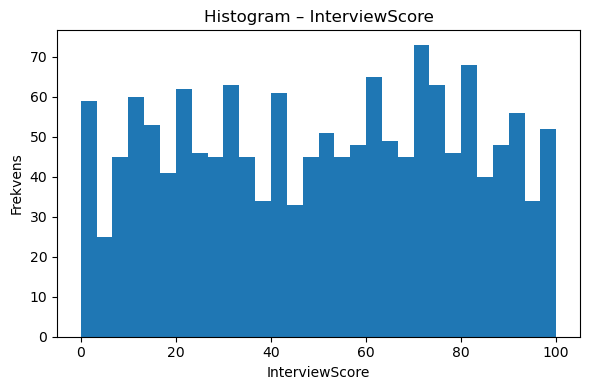

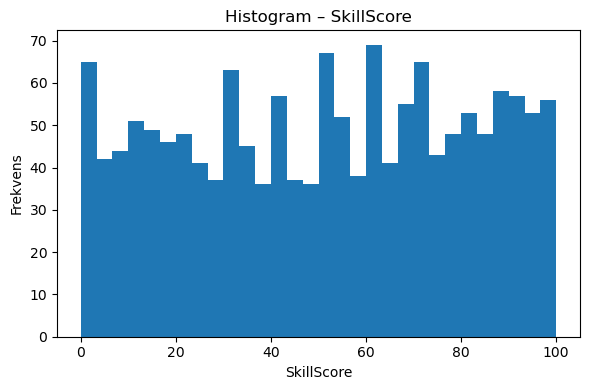

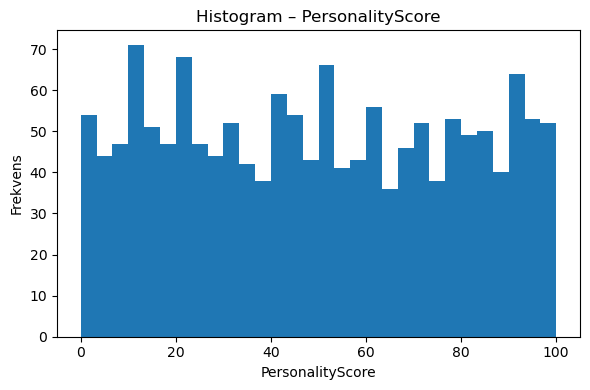

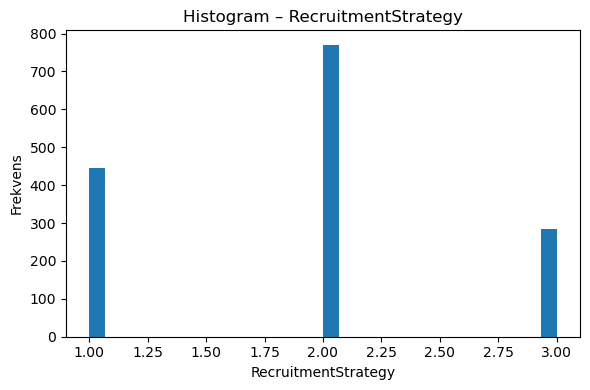

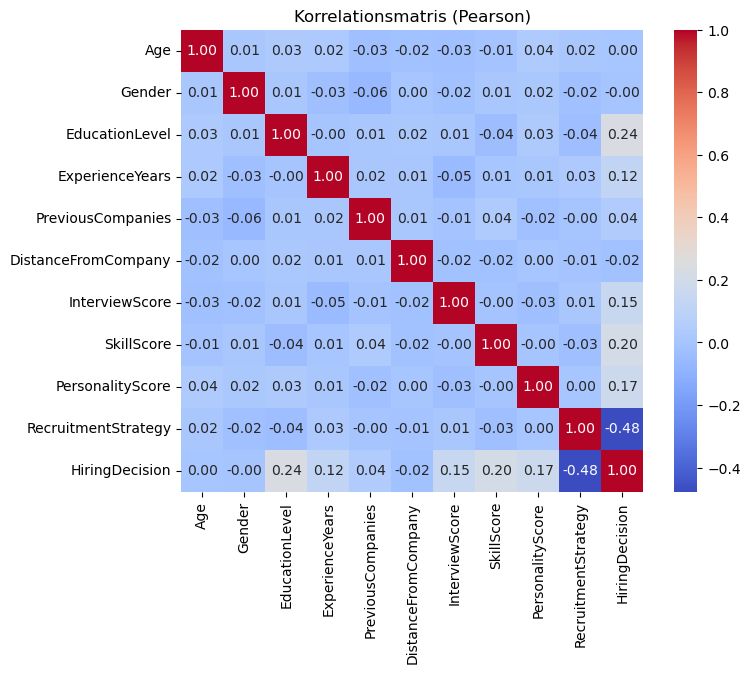


Korrelation mot HiringDecision:
 EducationLevel         0.236710
SkillScore             0.203668
PersonalityScore       0.169177
InterviewScore         0.146064
ExperienceYears        0.122494
PreviousCompanies      0.044025
Age                    0.001850
Gender                -0.002249
DistanceFromCompany   -0.016791
RecruitmentStrategy   -0.477552
Name: HiringDecision, dtype: float64 



/var/folders/66/n7t02x9n3px6n956yn182btr0000gn/T/ipykernel_4436/140414384.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.index, y=target_corr.values, palette="viridis")


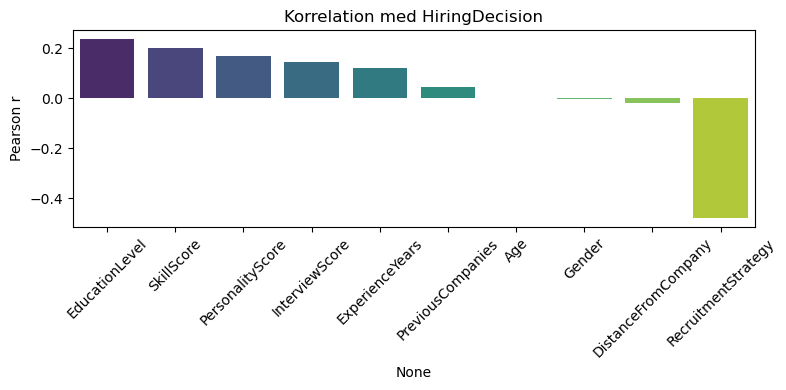


Medelvärden per feature för varje klass (0/1) + skillnad:
 HiringDecision               0          1  diff(1-0)
Age                  35.137198  35.174194   0.036995
Gender                0.492754   0.490323  -0.002431
EducationLevel        2.051208   2.492473   0.441265
ExperienceYears       7.313043   8.541935   1.228892
PreviousCompanies     2.960386   3.094624   0.134237
DistanceFromCompany  25.669273  25.140583  -0.528690
InterviewScore       47.762319  56.800000   9.037681
SkillScore           47.110145  60.032258  12.922113
PersonalityScore     46.059903  56.793548  10.733645
RecruitmentStrategy   2.114010   1.402151  -0.711859 


Gender vs HiringDecision – andelar per kategori:
 HiringDecision      0      1
Gender                      
0               0.689  0.311
1               0.691  0.309

Gender vs HiringDecision – antal per kategori:
 HiringDecision    0    1
Gender                  
0               525  237
1               510  228

EducationLevel vs HiringDecision – and

In [53]:
# === Komplett EDA för recruitment_data.csv ===

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

# 1️⃣ Läs in data
df = pd.read_csv("recruitment_data.csv")

# 2️⃣ Grundinfo & exempelrader
print(f"Antal rader: {df.shape[0]}, kolumner: {df.shape[1]}\n")
print("Datatyper per kolumn:\n", df.dtypes.to_string(), "\n")
display(df.head(20))

# 3️⃣ Saknade värden & dubbletter
missing = df.isna().sum().to_frame("missing_count")
missing["missing_pct"] = (missing["missing_count"] / len(df) * 100).round(2)
print("\nSaknade värden per kolumn:\n", missing)
print("\nAntal dubblettrader:", df.duplicated().sum())

# 4️⃣ Unika värden & deskriptiv statistik
print("\nAntal unika värden per kolumn:\n", df.nunique())
desc = df.describe(include="all").T
desc["median"] = df.median(numeric_only=True)
print("\nDeskriptiv statistik (inkl. median):\n", desc)

# 5️⃣ Fördelning av målvariabeln
if "HiringDecision" in df.columns:
    target_counts = df["HiringDecision"].value_counts().sort_index()
    target_pct = (target_counts / target_counts.sum() * 100).round(2)
    print("\nFördelning av HiringDecision (0/1):\n",
          pd.DataFrame({"count": target_counts, "percent": target_pct}), "\n")

    plt.figure(figsize=(5,4))
    plt.bar(target_counts.index.astype(str), target_counts.values)
    plt.title("Fördelning: HiringDecision")
    plt.xlabel("Klass")
    plt.ylabel("Antal")
    plt.show()

# 6️⃣ Histogram för varje numerisk variabel
numeric_cols = [c for c in df.columns
                if pd.api.types.is_numeric_dtype(df[c]) and c != "HiringDecision"]

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f"Histogram – {col}")
    plt.xlabel(col)
    plt.ylabel("Frekvens")
    plt.tight_layout()
    plt.show()

# 7️⃣ Korrelationsmatris (Pearson)
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Korrelationsmatris (Pearson)")
plt.show()

# 8️⃣ Korrelation mot målvariabeln
if "HiringDecision" in corr.columns:
    target_corr = corr["HiringDecision"].drop("HiringDecision").sort_values(ascending=False)
    print("\nKorrelation mot HiringDecision:\n", target_corr, "\n")

    plt.figure(figsize=(8,4))
    sns.barplot(x=target_corr.index, y=target_corr.values, palette="viridis")
    plt.title("Korrelation med HiringDecision")
    plt.ylabel("Pearson r")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 9️⃣ Medelvärden per klass + differens
means_by_target = df.groupby("HiringDecision").mean(numeric_only=True).T
if 0 in means_by_target.columns and 1 in means_by_target.columns:
    means_by_target["diff(1-0)"] = means_by_target[1] - means_by_target[0]
print("\nMedelvärden per feature för varje klass (0/1) + skillnad:\n", means_by_target, "\n")

# 🔟 Kors-tabeller för kategoriska variabler
cat_like = [c for c in ["Gender", "EducationLevel", "RecruitmentStrategy"] if c in df.columns]
for c in cat_like:
    print(f"\n{c} vs HiringDecision – andelar per kategori:\n",
          pd.crosstab(df[c], df["HiringDecision"], normalize="index").round(3))
    print(f"\n{c} vs HiringDecision – antal per kategori:\n",
          pd.crosstab(df[c], df["HiringDecision"]))

# 1️⃣1️⃣ Outliers (|z|>3) per numerisk kolumn
outlier_counts = {}
for col in numeric_cols + ["HiringDecision"]:
    vals = df[col].astype(float)
    z = (vals - vals.mean()) / vals.std(ddof=0)
    outlier_counts[col] = int((z.abs() > 3).sum())
print("\nOutlier-antal per kolumn (|z|>3):\n",
      pd.DataFrame.from_dict(outlier_counts, orient="index", columns=["outlier_count"]))

# 1️⃣2️⃣ Starkt korrelerade par (|r| ≥ 0.8)
strong_pairs = []
for a, b in combinations(corr.columns, 2):
    r = corr.loc[a, b]
    if abs(r) >= 0.8:
        strong_pairs.append((a, b, round(r, 3)))
print("\nStarkt korrelerade par (|r| ≥ 0.8):\n",
      pd.DataFrame(strong_pairs, columns=["feature_a", "feature_b", "corr"]))
